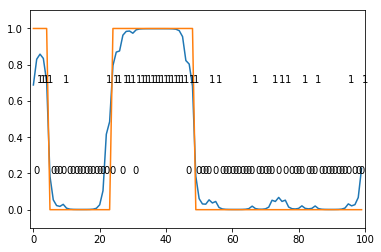

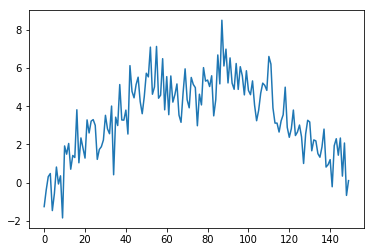

In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Markov import CategoricalHMM, Kalman, Particle

categorical_hmm = CategoricalHMM(
    initial_proba=np.ones(2) / 2,
    transition_proba=np.array([[0.95, 0.05], [0.05, 0.95]]),
    means=np.array([[0.8, 0.2], [0.2, 0.8]]))

seq = categorical_hmm.draw(100)
posterior = categorical_hmm.forward_backward(seq)
hidden = categorical_hmm.viterbi(seq)
plt.plot(posterior[:, 1])
plt.plot(hidden)
for i in range(0, len(seq)):
    plt.annotate(str(seq[i]), (i, seq[i] / 2. + 0.2))
plt.xlim(-1, len(seq))
plt.ylim(-0.1, np.max(seq) + 0.1)
plt.show()
seq = np.concatenate(
    (np.arange(50)[:, None] * 0.1 + np.random.normal(size=(50, 1)),
     np.random.normal(loc=5., size=(50, 1)),
     5 - 0.1 * np.arange(50)[:, None] + np.random.normal(size=(50, 1))), axis=0)
seq = np.concatenate((seq, np.gradient(seq, axis=0)), axis=1)
plt.plot(seq[:, 0])
plt.show()

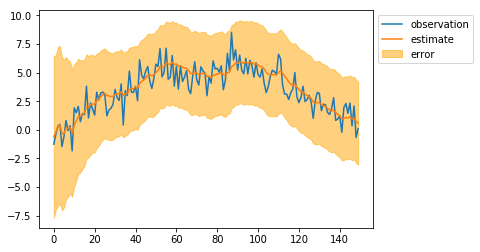

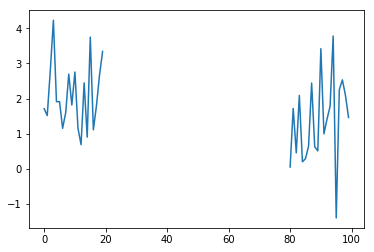

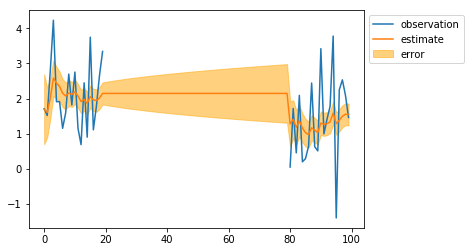

In [2]:
kalman = Kalman(
    transition=np.array([[1, 1], [0, 1]]),
    observation=np.eye(2),
    process_noise=np.eye(2) * 0.01,
    measurement_noise=np.eye(2) * 100,
    init_state_mean=np.zeros(2),
    init_state_cov=np.eye(2) * 100)

# seq = kalman.draw(100)

mean, var = kalman.filtering(seq)
velocity = mean[:, 1]
mean = mean[:, 0]
std = np.sqrt(var[:, 0, 0]).ravel()

plt.plot(seq[:, 0], label="observation")
plt.plot(mean, label="estimate")
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color="orange", alpha=0.5, label="error")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

seq = np.zeros((100, 1)) + np.random.normal(loc=2., size=(100, 1))
seq[20:80] = np.nan
plt.plot(seq)
plt.show()

kalman = Kalman(
    transition=np.eye(1),
    observation=np.eye(1),
    process_noise=np.eye(1) * 0.01,
    measurement_noise=np.eye(1),
    init_state_mean=np.zeros(1),
    init_state_cov=np.eye(1) * 100)

mean, var = kalman.filtering(seq)
mean = mean.ravel()
std = np.sqrt(var).ravel()

plt.plot(seq, label="observation")
plt.plot(mean, label="estimate")
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color="orange", alpha=0.5, label="error")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [3]:
# def nll(x, particle):
#     return np.sum(100. * (x - particle) ** 2, axis=-1)
# particle = Particle(1000, 1, 1)

# estimate = particle.filtering(seq)

# plt.plot(seq[:, 0], label="observation")
# plt.plot(estimate, label="estimate")
# plt.legend(bbox_to_anchor=(1, 1))
# plt.show()